<a href="https://colab.research.google.com/github/joesiheon496/ModelPractice/blob/master/google_%EC%A3%BC%EC%8B%9D_%EC%83%81%ED%95%98%ED%96%A5_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset_train = pd.read_csv('/content/drive/MyDrive/2023/UDEMYPRECTICE/DEEPLEARNING/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [9]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [12]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [17]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train),np.array(y_train)

In [18]:
print(X_train)
print(X_train.shape)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
(1198, 60)


In [19]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [20]:
print(X_train)
print(X_train.shape)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
(1198, 60, 1)


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape =(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [24]:
regressor.compile(optimizer = 'adam',loss='mean_squared_error')

In [25]:
regressor.fit(X_train,y_train,epochs=100,batch_size = 32)

Epoch 1/100
38/38 [==============================] - 23s 163ms/step - loss: 0.0401
Epoch 2/100
38/38 [==============================] - 9s 248ms/step - loss: 0.0073
Epoch 3/100
38/38 [==============================] - 9s 239ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 10s 255ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 9s 247ms/step - loss: 0.0059
Epoch 6/100
38/38 [==============================] - 11s 272ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 10s 256ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 9s 248ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 8s 205ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 9s 236ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 11s 280ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 9s 230ms/step - loss: 0.0040
Epoch 13

In [26]:
dataset_test = pd.read_csv('/content/drive/MyDrive/2023/UDEMYPRECTICE/DEEPLEARNING/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [27]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


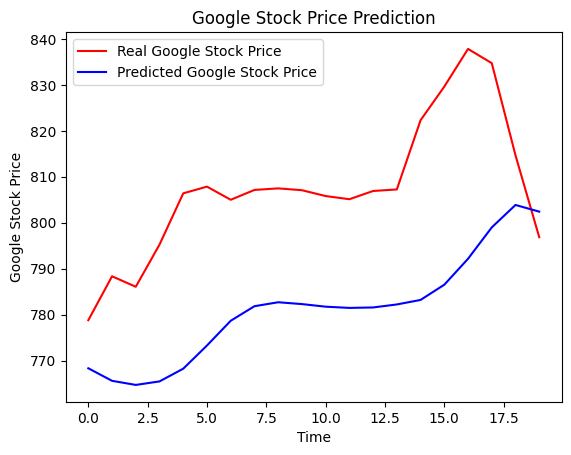

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()